In [1]:
# DELIVERABLE FOR THE PROJECT:
# "KINEMATICS OF MOBILITY"
# David Pastor-Escuredo (LifeD Lab)
# Licencia MIT

In [2]:
#Copyright <2019> <David Pastor Escuredo>

#Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

#The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

#THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

In [24]:
import pandas as pd
import numpy as np
import json
from nltk.tokenize import word_tokenize
import re
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
import collections
from sklearn.cluster import KMeans
from PIL import Image
import time
from datetime import datetime, timedelta, date
from os import listdir
from os.path import isfile, join
from geopandas import GeoDataFrame
from shapely.geometry import Point
import pickle
import math
from timeit import default_timer as timer

%matplotlib inline

def getday(d):
    if d<10:
        ds='0'+str(d)
    else:
        ds=str(d)
    return ds

In [43]:
datapath='/home/davidpastor/TEF_mob/'
netpath=datapath+'nets/'

yDay=15
region='_medellin'
th=0
#region=''
start = timer()
     
with open(netpath+'Net2refc'+region+'_th'+str(th)+'.cnf', 'rb') as fpp:
    Gf=pickle.load(fpp)
    
with open(netpath+'Netu2refc'+region+'_th'+str(th)+'.cnf', 'rb') as fpp:
    Gu=pickle.load(fpp)    

with open(netpath+'Net2c'+'_'+str(yDay)+region+'.cnf', 'rb') as fpp:
    G=pickle.load(fpp)
    
with open(netpath+'Netu2c'+'_'+str(yDay)+region+'.cnf', 'rb') as fpp:
    Gu2=pickle.load(fpp)    

es_w=[]
es = Gf.edges()
for e in es:
    n1=e[0]
    n2=e[1]
    w=Gf[n1][n2]['weight']
    es_w.append(w)

es1_w=[]
es1 = Gu.edges()
for e in es1:
    n1=e[0]
    n2=e[1]
    w=Gu[n1][n2]['weight']
    es1_w.append(w)
            
es2_w=[]
es2 = G.edges()
for e in es2:
    n1=e[0]
    n2=e[1]
    w=G[n1][n2]['weight']
    es2_w.append(w)
    
es3_w=[]
es3 = Gu2.edges()
for e in es3:
    n1=e[0]
    n2=e[1]
    w=Gu2[n1][n2]['weight']
    es3_w.append(w)

In [44]:
es_w=np.array(es_w)
print(len(es_w))
x=(es_w<1)
x1=es_w[x]
print(len(x1))


es1_w=np.array(es1_w)
print(len(es1_w))
x=(es1_w<1)
x1=es1_w[x]
print(len(x1))


es2_w=np.array(es2_w)
print(len(es2_w))
x=(es2_w<1)
x1=es2_w[x]
print(len(x1))

es3_w=np.array(es3_w)
print(len(es3_w))
x=(es3_w<1)
x1=es3_w[x]
print(len(x1))

153758
0
113522
0
52151
0
41712
0


2.1356962456154043
4.056067956510901
2.641282893770958
5.071154583812811
153758
52151
113522
41712
1.6968473341980006
2.780965426763389
2.01008179724181
3.3655310815058392
153431
51832
113166
41359


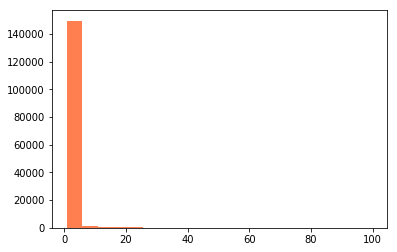

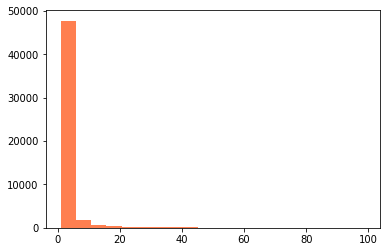

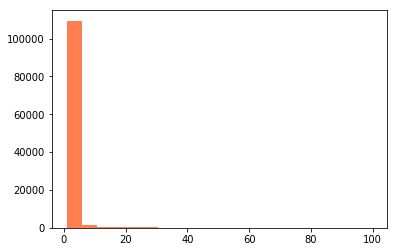

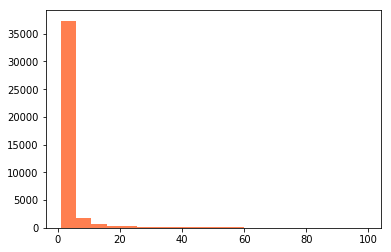

In [47]:
ave_es=np.mean(es_w)
ave_es2=np.mean(es2_w)
ave_es1=np.mean(es1_w)
ave_es3=np.mean(es3_w)

print(ave_es)
print(ave_es2)
print(ave_es1)
print(ave_es3)

print(len(es_w))
print(len(es2_w))
print(len(es1_w))
print(len(es3_w))

nb=20

mn=0
mx=100

es_w=np.array(es_w)
x=((es_w>mn) & (es_w<mx))
es_w_f=es_w[x]

es1_w=np.array(es1_w)
x=((es1_w>mn) & (es1_w<mx))
es1_w_f=es1_w[x]

es2_w=np.array(es2_w)
x=((es2_w>mn) & (es2_w<mx))
es2_w_f=es2_w[x]

es3_w=np.array(es3_w)
x=((es3_w>mn) & (es3_w<mx))
es3_w_f=es3_w[x]

ave_es=np.mean(es_w_f)
ave_es2=np.mean(es2_w_f)
ave_es1=np.mean(es1_w_f)
ave_es3=np.mean(es3_w_f)

print(ave_es)
print(ave_es2)
print(ave_es1)
print(ave_es3)

print(len(es_w_f))
print(len(es2_w_f))
print(len(es1_w_f))
print(len(es3_w_f))

plt.clf()
n, b, patches=plt.hist(es_w_f,bins=nb,color='coral') 
plt.savefig("Figs/Histogram_reference_network"+region+'_th'+str(th)+'.png')
plt.show()

plt.clf()
n, b, patches=plt.hist(es2_w_f,bins=nb,color='coral') 
plt.savefig("Figs/Histogram_day_network"+region+'_th'+str(th)+'.png')
plt.show()

plt.clf()
n, b, patches=plt.hist(es1_w_f,bins=nb,color='coral') 
plt.savefig("Figs/Histogram_reference_undir_network"+region+'_th'+str(th)+'.png')
plt.show()

plt.clf()
n, b, patches=plt.hist(es3_w_f,bins=nb,color='coral') 
plt.savefig("Figs/Histogram_day_undir_network"+region+'_th'+str(th)+'png')
plt.show()

In [46]:
print(dif_time_std)

NameError: name 'dif_time_std' is not defined